In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the data
file_path = '/Users/yeshwanthsatyadev/Downloads/Fraud_check.csv'
fraud_data = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)
# Display basic statistics and information about the dataset
print(fraud_data.info())
print(fraud_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB
None
       Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.

In [3]:
# Check for missing values
print(f"Missing values:\n{fraud_data.isnull().sum()}")

Missing values:
Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64


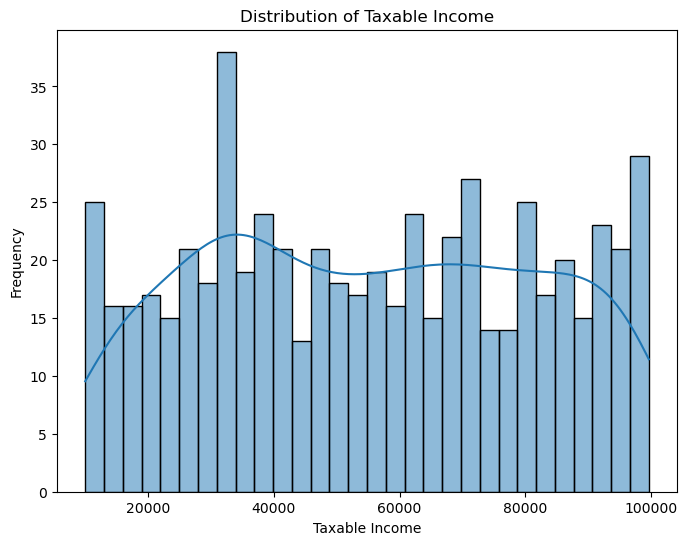

In [4]:
# Visualize the distribution of Taxable Income
plt.figure(figsize=(8, 6))
sns.histplot(fraud_data['Taxable.Income'], bins=30, kde=True)
plt.title('Distribution of Taxable Income')
plt.xlabel('Taxable Income')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Convert 'Taxable.Income' to categorical variable 'Risk'
fraud_data['Risk'] = pd.cut(fraud_data['Taxable.Income'], bins=[-float('inf'), 30000, float('inf')], labels=['Risky', 'Good'])

In [7]:
# Encode categorical variables
label_encoder = LabelEncoder()
fraud_data['Undergrad'] = label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital.Status'] = label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban'] = label_encoder.fit_transform(fraud_data['Urban'])

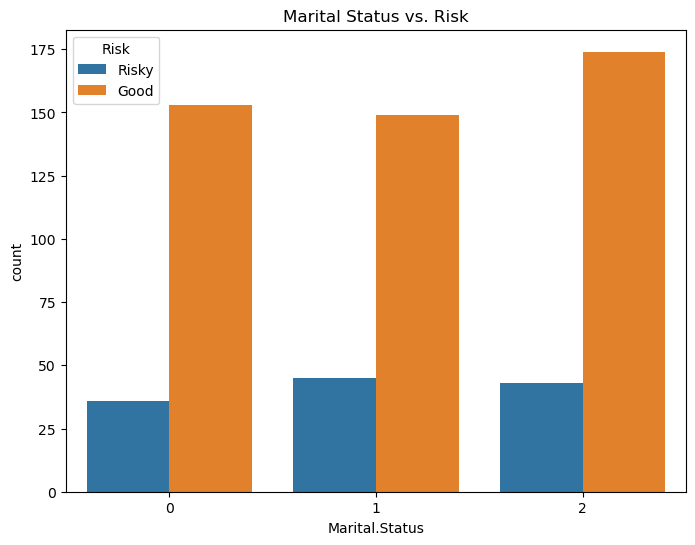

In [8]:
# Visualize the relationship between Marital Status and Risk
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital.Status', hue='Risk', data=fraud_data)
plt.title('Marital Status vs. Risk')
plt.show()

In [9]:
# Split the data into features (X) and target variable (y)
X = fraud_data.drop(['Taxable.Income', 'Risk'], axis=1)
y = fraud_data['Risk']

In [10]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Decision Tree Model for Classification
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Model Evaluation
y_pred = dt_model.predict(X_test)

In [12]:
# Calculate accuracy and display confusion matrix and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.6666666666666666
Confusion Matrix:
[[74 20]
 [20  6]]
Classification Report:
              precision    recall  f1-score   support

        Good       0.79      0.79      0.79        94
       Risky       0.23      0.23      0.23        26

    accuracy                           0.67       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.67      0.67      0.67       120



In [13]:
# Display Decision Tree
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- City.Population <= 60294.50
|   |--- Undergrad <= 0.50
|   |   |--- Marital.Status <= 1.50
|   |   |   |--- City.Population <= 34470.00
|   |   |   |   |--- class: Good
|   |   |   |--- City.Population >  34470.00
|   |   |   |   |--- City.Population <= 36489.50
|   |   |   |   |   |--- Work.Experience <= 11.00
|   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |--- Work.Experience >  11.00
|   |   |   |   |   |   |--- class: Risky
|   |   |   |   |--- City.Population >  36489.50
|   |   |   |   |   |--- City.Population <= 52621.50
|   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |--- City.Population >  52621.50
|   |   |   |   |   |   |--- City.Population <= 53029.50
|   |   |   |   |   |   |   |--- class: Risky
|   |   |   |   |   |   |--- City.Population >  53029.50
|   |   |   |   |   |   |   |--- City.Population <= 54407.00
|   |   |   |   |   |   |   |   |--- City.Population <= 53813.00
|   |   |   |   |   |   |   |   |   |--- clas